# TASK 1
# SUPERVISED MACHINE LEARNING 
## Name :Arfa Ahsan
## #GRIPFEBRUARY24

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load and understand the Data

In [2]:
#Reading the data from the url
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#displays first few rows of the dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# displays last few rows of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Displays the number of rows and columns in the dataset
print("The rows and columns of the dataset are :",df.shape)

The rows and columns of the dataset are : (25, 2)


In [6]:
#checks the data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
#check for duplicated rows
duplicated_rows=df.duplicated().sum()
print("The number of duplicated rows are:",duplicated_rows)

The number of duplicated rows are: 0


In [8]:
#display the missing values 
missing_values=df.isna().sum()
print(missing_values)

Hours     0
Scores    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [9]:
#Displaying the summary statistics for numerical columns
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


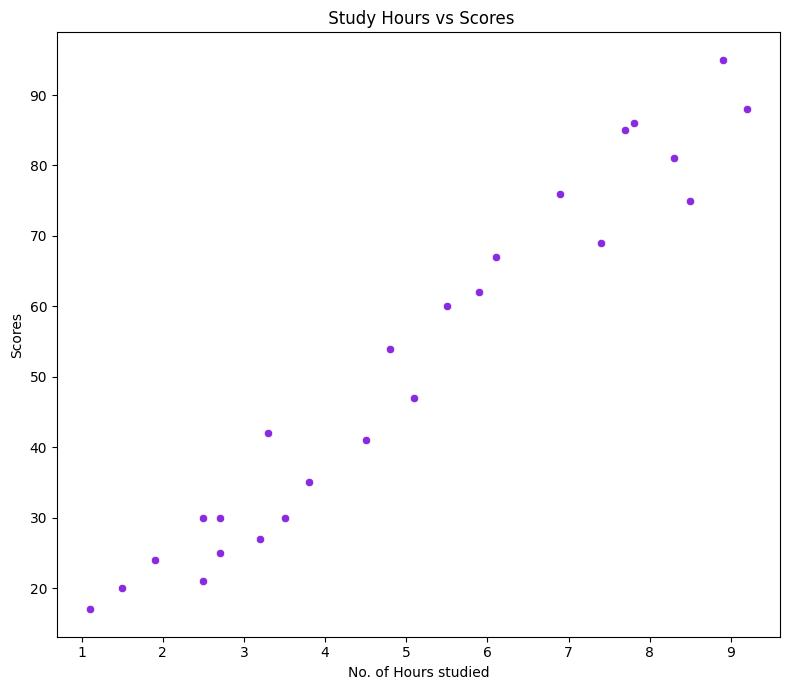

In [10]:
#visualizing the data through graphs
plt.figure(figsize=(8,7))
sns.scatterplot(x="Hours",y="Scores",data=df,color="#8A2BE2")
plt.title(" Study Hours vs Scores")
plt.xlabel("No. of Hours studied")
plt.ylabel("Scores")
plt.tight_layout()
plt.show()

In [11]:
#Determining correlation 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


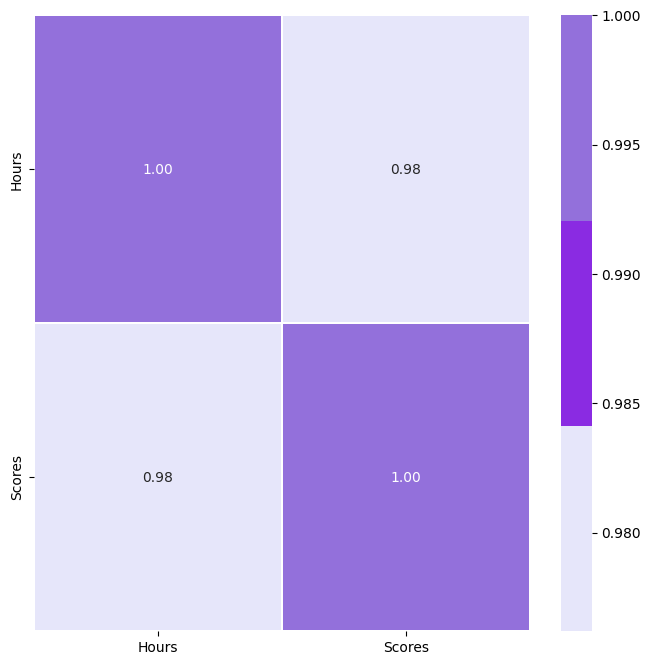

In [12]:
#plotting heatmap to show how columns are related to each other
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap=["#E6E6FA", "#8A2BE2", "#9370DB",],fmt=".2f", linewidths=0.23)
plt.show()

## INSIGHTS:
#### * There were no duplicated rows
#### * There were no missing values
#### * There were no outliers
#### * The scatter plot shows a positive linear relationship.The more time a student spents on studing ,the more likely he is to get a good score
#### * The correlation is strongly postive between the number of hours studied and scores

In [13]:
#Extracting x as features
#Extracting y as a target variable
X = df.drop(columns="Scores")
y = df["Scores"]

In [14]:
print("The values of X are :")
X

The values of X are :


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
print("The values of y are :")
y

The values of y are :


0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [16]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


## Model Training

In [17]:
#splitting the dataset in to train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)


In [18]:
#to predict score based on hours studied ,we train the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("The model is trained")

The model is trained


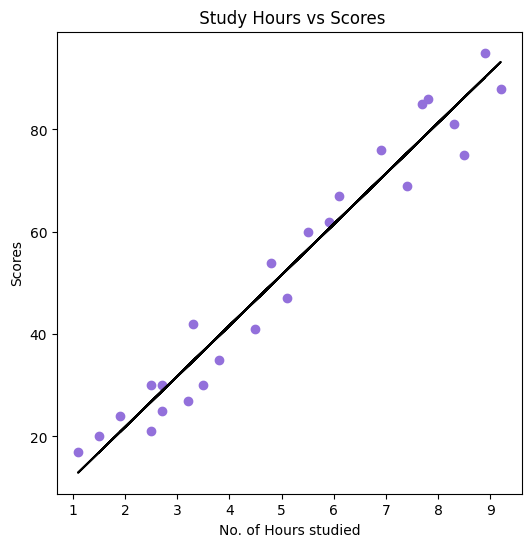

In [19]:
#visualizing the data through graphs
plt.figure(figsize=(6,6))
reg_line = lr.coef_*X+lr.intercept_
plt.scatter(X, y,color="#9370DB")
plt.plot(X, reg_line,color="black");
plt.title(" Study Hours vs Scores")
plt.xlabel("No. of Hours studied")
plt.ylabel("Scores")
plt.show()

## Making Predictions

In [20]:
#Now ,make predictions using the test data 
y_predict=lr.predict(X_test)

In [21]:
prediction= pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
prediction 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [22]:
#Prediction on new data
hours=9.25
score_predict=lr.predict([[hours]])
print("no of hours studied :",hours)
print("Predicted Score :",score_predict[0])

no of hours studied : 9.25
Predicted Score : 93.69173248737535


## Model Evaluation


In [23]:
#Displaying the coefficient
print("Coefficients:", lr.coef_)

Coefficients: [9.91065648]


In [24]:
#Displaying the y-intercept
print("y intercept:", lr.intercept_)

y intercept: 2.0181600414346974


In [25]:
from sklearn import metrics
# The mean squared error
print("Mean squared error:" , metrics.mean_squared_error(y_test,y_predict))
# The mean absolute error
print("Mean absolute error:" , metrics.mean_absolute_error(y_test,y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:" , metrics.r2_score(y_test,y_predict)) # between 1 and -1

Mean squared error: 21.598769307217406
Mean absolute error: 4.183859899002975
Coefficient of determination: 0.9454906892105355
